In [9]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import packages.csv_to_df as csv_to_df
import re

In [10]:
boca_df = csv_to_df.to_df('Boca_DF.csv')

Crear un gráfico mostrando la evolución del historial de partidos oficiales entre Boca y otro equipo

In [11]:
def get_historial(rival):
    # Agregar fuentes personalizadas
    custom_font_text_path = 'fonts/Helvetica.ttf'
    custom_font_text = FontProperties(fname=custom_font_text_path)
    custom_font_title_path = 'fonts/Helvetica-Neue-LT-Std-85-Heavy.ttf'
    custom_font_title = FontProperties(fname=custom_font_title_path)

    # Crear un DataFrame que únicamente contenga partidos jugados contra el rival seleccionado
    df = boca_df.query(f"`Equipo Local` == '{rival}' or `Equipo Visitante` == '{rival}'")
    df = df.reset_index(drop=True)

    # Crear variables necesarias para acumular el historial y los años de los partidos jugados
    historial = 0
    historial_values = []
    historial_dates = []

    # Iterar por cada fila del nuevo DataFrame y acumular los resultados
    for index, row in df.iterrows():
        if isinstance(row['Resultado Local'], float) or isinstance('Resulado Visitante', float): continue
        resultado_local = re.search(r'\d+', row['Resultado Local']).group()
        resultado_visitante = re.search(r'\d+', row['Resultado Visitante']).group()
        year = row['Fecha'].year
        historial_dates.append(year)
        if row['Equipo Local'] == 'Boca':
            if resultado_local > resultado_visitante:
                historial += 1
            elif resultado_local < resultado_visitante:
                historial -= 1
        elif row['Equipo Visitante'] == 'Boca':
            if resultado_visitante > resultado_local:
                historial += 1
            elif resultado_visitante < resultado_local:
                historial -= 1
        historial_values.append(historial)

    # Rellenar los valores para que no haya espacios en blanco al momento de graficar las barras. También grafica el historial hasta el 2024.
    filled_historial_values = []
    filled_historial_dates = []
    prev_value = historial_values[0]  # Valor inicial para el primer año
    for i, year in enumerate(historial_dates):
        if i > 0 and historial_dates[i] - historial_dates[i - 1] > 1:
            # Si falta un año, llenar el valor del año faltante con el valor anterior
            for missing_year in range(historial_dates[i - 1] + 1, historial_dates[i]):
                filled_historial_values.append(prev_value)
                filled_historial_dates.append(missing_year)
        filled_historial_values.append(historial_values[i])
        filled_historial_dates.append(year)
        prev_value = historial_values[i]

    # Configurar cada cuánto se mostrarán los años en los valores de x
    custom_xticks = []
    for year in filled_historial_dates:
        if year % 10 == 0:
            custom_xticks.append(year)

    # Conseguir la mayor diferencia histórica de Boca
    positive_values = list(filter(lambda x: x > 0, historial_values))
    if positive_values:
        boca_max = max(positive_values)
    else:
        boca_max = 0
    # Conseguir la mayor diferencia histórica del rival seleccionado
    negative_values = list(filter(lambda x: x < 0, historial_values))
    if negative_values:
        rival_max = abs(min(negative_values))
    else:
        rival_max = 0

    # Conseguir cuál es la diferencia acutal y crear el texto que se mostrará en pantalla dependiendo cómo sea el resultado
    current_historial = historial_values[-1]
    if current_historial > 0:    
        historial_text = f'-  El historial acutal está +{current_historial} a favor de Boca'
    elif current_historial < 0:
        historial_text = f'-  El historial acutal está +{abs(current_historial)} a favor de {rival}'
    else:
        historial_text = '-  El historial actual está empatado'
    boca_max = f'+{boca_max}'
    rival_max = f'+{rival_max}'

    # Conseguir la cantidad de partidos jugados
    total_matches = len(historial_values)


    # Ajustar el tamaño, color del gráfico y otras configuraciones
    plt.figure(figsize=(15, 8), facecolor='#F9F9F9')
    plt.gca().set_facecolor('#F9F9F9')
    colors = ['#004dc3' if val >= 0 else '#f00000' for val in filled_historial_values]
    plt.bar(filled_historial_dates, filled_historial_values, width=0.75, color=colors, align='edge')
    plt.xticks(custom_xticks)

    # Agregar información al gráfico
    plt.title(f'Evolución del historial de Boca vs. {rival} en todos los partidos oficiales', x=0, y=1.12, horizontalalignment='left', fontproperties=custom_font_title, fontsize=18)
    plt.text(1.02, 1.2, ' ', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.text(-0.07, -0.3, ' ', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.text(0, 1.1, 'Información extraída de historiadeboca.com.ar | Hecho por @valensantarone', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, alpha=0.6, fontsize=13, fontproperties=custom_font_text)
    plt.text(0, 1.06, f'Boca en azul y positivo, {rival} en rojo y negativo', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, alpha=0.6, fontsize=11, fontproperties=custom_font_text)
    plt.text(0, -0.1, f'Boca y {rival} jugaron una totalidad de {total_matches} partidos', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, alpha=0.7, fontproperties=custom_font_text)
    plt.text(0, -0.15, historial_text, horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, alpha=0.7, fontproperties=custom_font_text)
    plt.text(0, -0.2, f'-  La mayor ventaja histórica para Boca fue {boca_max}', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, alpha=0.7, fontproperties=custom_font_text)
    plt.text(0, -0.25, f'-  La mayor ventaja histórica para {rival} fue {rival_max}', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, alpha=0.7, fontproperties=custom_font_text)
    plt.xlabel('Año', fontproperties=custom_font_text)
    plt.ylabel('Diferencia en el historial', fontproperties=custom_font_text)
    plt.grid(True, color='gray', alpha=0.1)

    # Mostrar el gráfico
    plt.show()

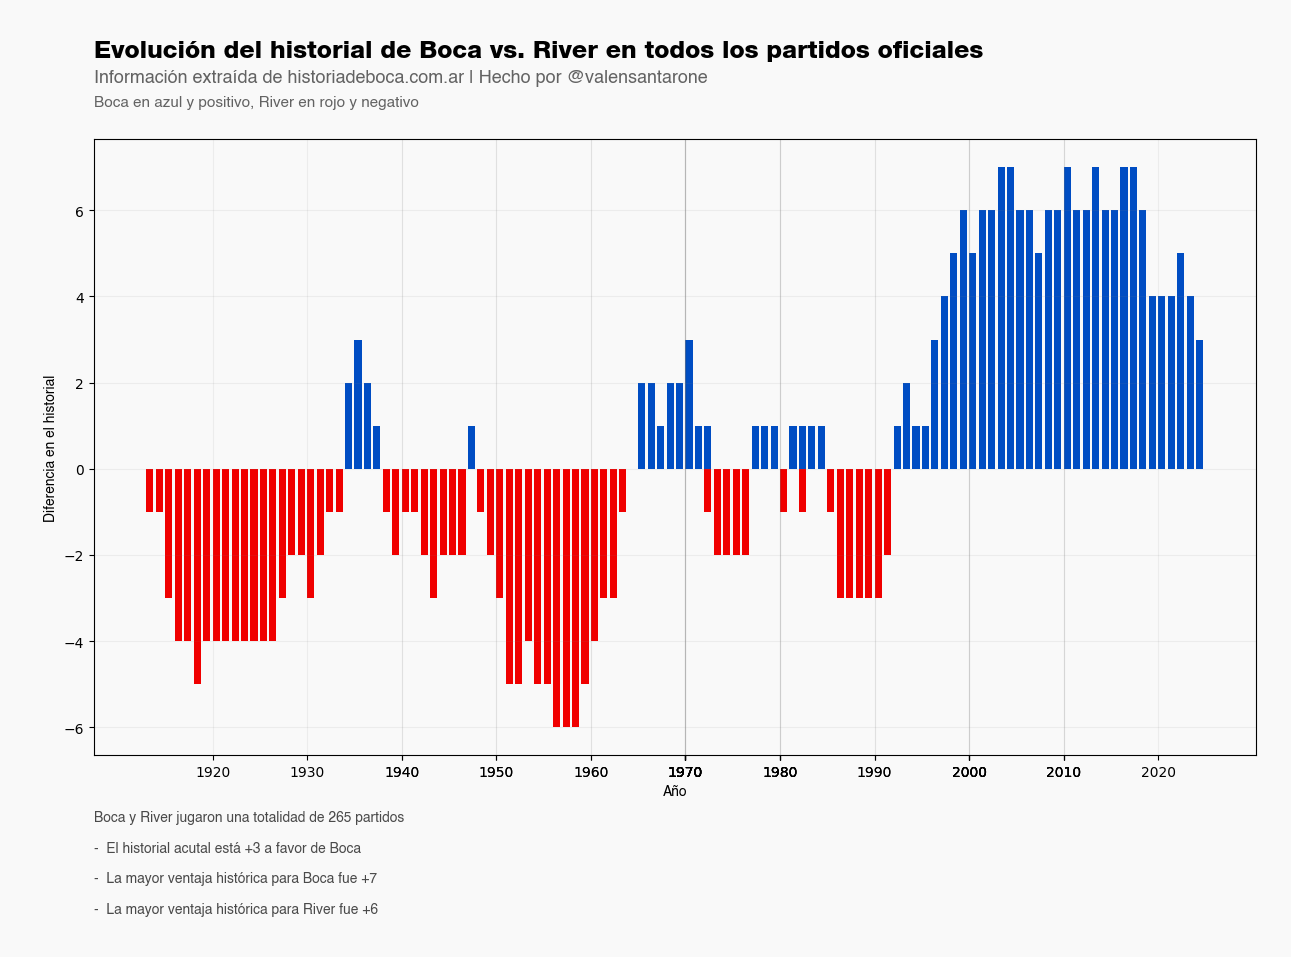

In [13]:
# Seleccionar rival para ver la evolución del historial
# (El nombre debe ser tal cual aparece en el DataFrame o en la página de historiadeboca.com.ar)
rival = "River"
get_historial(rival)